<a href="https://colab.research.google.com/github/potterhead789/face-mask-recognition-using-CNN/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install kaggle

In [10]:
# configuring kaggle.json file path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [11]:
#fetch the dataset from Kaggle using API
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [12]:
# extracting the compessed Dataset (.zip file)
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset extracted!!')

Dataset extracted!!


In [13]:
!ls #to list all the files

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing Dependencies**

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #since we cannot use cv2.imshow in nb env
from PIL import Image
from sklearn.model_selection import train_test_split

In [15]:
with_mask_files = os.listdir('/content/data/with_mask') #return list of all files that particular dir
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_94.jpg', 'with_mask_2145.jpg', 'with_mask_606.jpg', 'with_mask_2978.jpg', 'with_mask_3281.jpg']
['with_mask_109.jpg', 'with_mask_2228.jpg', 'with_mask_1514.jpg', 'with_mask_302.jpg', 'with_mask_1661.jpg']


In [16]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1390.jpg', 'without_mask_740.jpg', 'without_mask_1538.jpg', 'without_mask_1775.jpg', 'without_mask_263.jpg']
['without_mask_1533.jpg', 'without_mask_663.jpg', 'without_mask_114.jpg', 'without_mask_2297.jpg', 'without_mask_282.jpg']


In [17]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  =>  1

without mask  =>  0

In [18]:
# create labels
with_mask_labels = [1]*3725   #list of 3725 elements and all elem = 1
without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [21]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

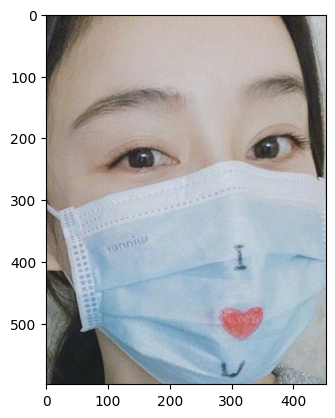

In [22]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1466.jpg')
imgplot = plt.imshow(img)
plt.show()

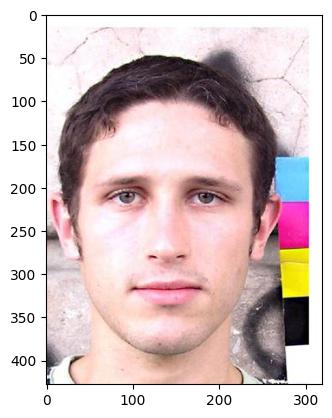

In [28]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1234.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [29]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) #eg:  /content/data/with_mask/ + with_mask_94.jpg
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [30]:
type(data)

list

In [31]:
len(data)

7553

array([[[105,  87,  75],
        [100,  82,  70],
        [ 94,  77,  66],
        ...,
        [ 79,  60,  44],
        [ 81,  62,  45],
        [ 93,  72,  55]],

       [[102,  84,  72],
        [116,  98,  86],
        [105,  87,  77],
        ...,
        [ 71,  52,  37],
        [ 74,  55,  38],
        [ 90,  69,  52]],

       [[ 88,  70,  58],
        [109,  91,  79],
        [101,  84,  74],
        ...,
        [ 89,  70,  55],
        [ 81,  62,  45],
        [ 71,  49,  32]],

       ...,

       [[153, 111,  99],
        [142, 100,  88],
        [139,  96,  84],
        ...,
        [183, 162, 134],
        [183, 162, 135],
        [180, 161, 133]],

       [[152, 109,  99],
        [138,  97,  86],
        [132,  88,  78],
        ...,
        [184, 163, 134],
        [183, 163, 132],
        [181, 162, 131]],

       [[152, 109, 100],
        [136,  93,  85],
        [130,  86,  77],
        ...,
        [181, 162, 132],
        [182, 163, 131],
        [182, 162, 129]]], dtype=uint8)
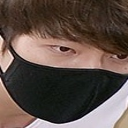

In [32]:
data[0]

In [33]:
type(data[0])

numpy.ndarray

In [34]:
data[0].shape

(128, 128, 3)

In [40]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [41]:
type(X)

numpy.ndarray

In [42]:
type(Y)

numpy.ndarray

In [45]:
print(X.shape) #no.,height,width,no of channels
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [44]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [53]:
# scaling data - so all values bw 0(black) and 1(=255/255=white)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[243, 243, 243],
        [244, 244, 244],
        [252, 252, 252],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[255, 216, 171],
        [221, 178, 150],
        [120,  81, 119],
        ...,
        [ 80,  84, 136],
        [243, 250, 246],
        [255, 254, 252]],

       [[255, 216, 172],
        [235, 205, 171],
        [148, 141, 173],
        ...,
        [ 88,  91, 146],
        [244, 251, 250],
        [255, 252, 252]],

       [[254, 222, 182],
        [249, 217, 161],
        [196, 166, 160],
        ...,
        [100, 102, 163],
        [244, 250, 250],
        [255, 253, 254]]], dtype=uint8)
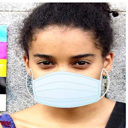

In [50]:
X_train[0]

In [51]:
X_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.95294118, 0.95294118, 0.95294118],
        [0.95686275, 0.95686275, 0.95686275],
        [0.98823529, 0.98823529, 0.98823529],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[1.        , 0.84705882, 0.67058824],
        [0.86666667, 0.69803922, 0.58823529],
        [0.47058824, 0

**Building a Convolutional Neural Networks (CNN)**

In [52]:
import tensorflow as tf
from tensorflow import keras

In [57]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
#filter size = 32
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

#all neurons in this layer connected to all neurons in prev layer
model.add(keras.layers.Dense(128, activation='relu'))
#to avoid overfitting - turnoff some neurons
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [60]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [84]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9889 - loss: 0.0320 - val_acc: 0.9504 - val_loss: 0.2131
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9905 - loss: 0.0305 - val_acc: 0.9240 - val_loss: 0.3061
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9862 - loss: 0.0616 - val_acc: 0.9240 - val_loss: 0.2727
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9867 - loss: 0.0343 - val_acc: 0.9455 - val_loss: 0.3639
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9905 - loss: 0.0321 - val_acc: 0.9455 - val_loss: 0.1925
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9909 - loss: 0.0247 - val_acc: 0.9372 - val_loss: 0.2672
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9912 - loss: 0.0227 - val_acc: 0.9471 - val_loss: 0.2946
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9915 - loss: 0.0307 - val_acc: 0.9438 - val_loss: 0.2439
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/

**Model Evaluation**

In [85]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9197 - loss: 0.5612
Test Accuracy = 0.9265387058258057


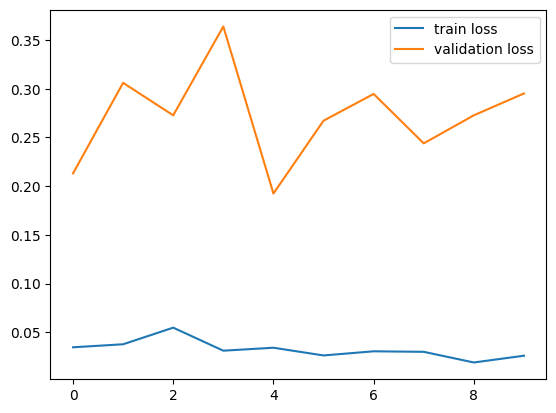

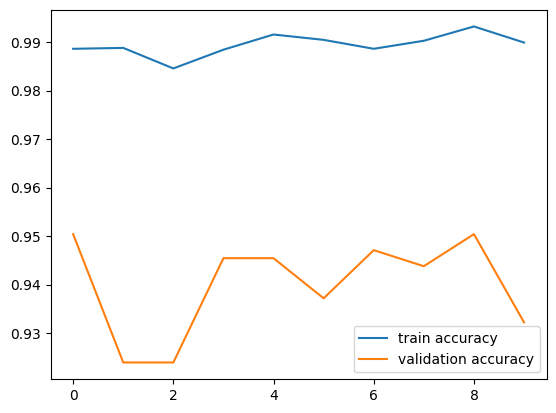

In [86]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test_without_mask.jpeg


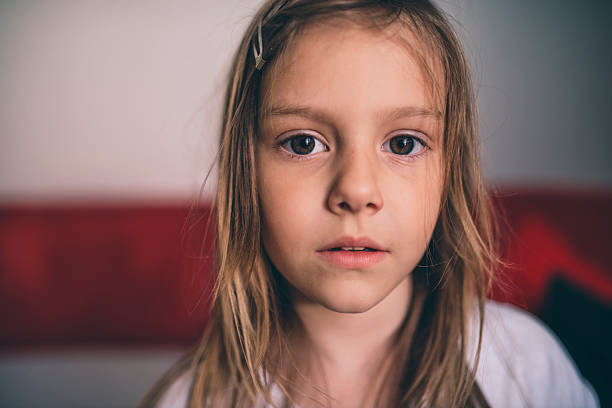

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.68445146 0.30587867]]
0
The person in the image is not wearing a mask


In [90]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test_with_mask.jpg


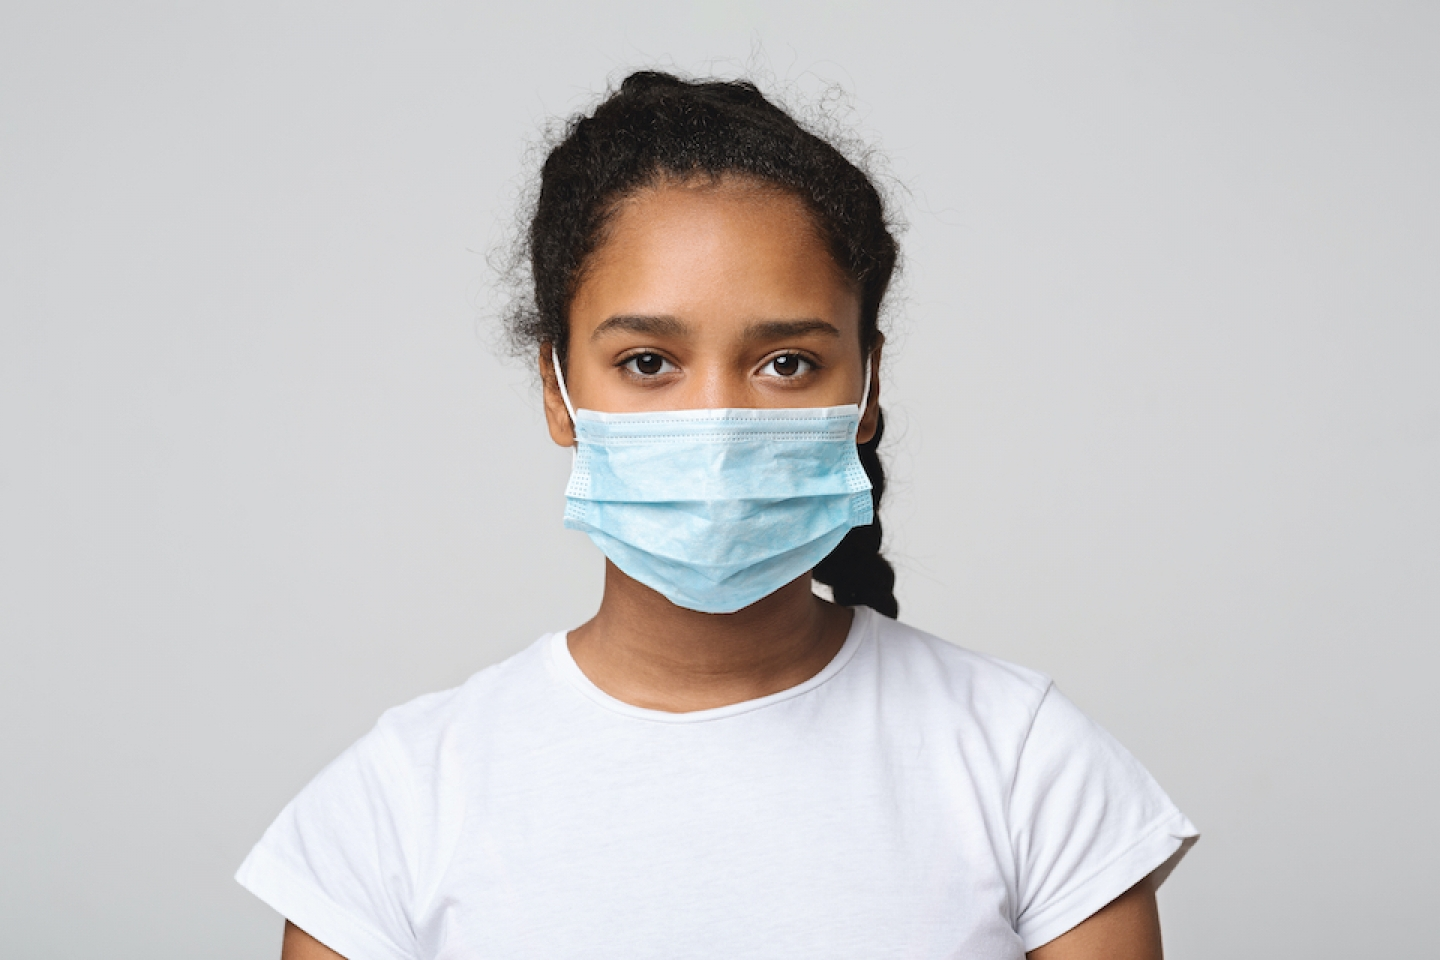

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.24615791 0.48068142]]
1
The person in the image is wearing a mask


In [91]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')